In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

############################
### Set global variables 
############################

data_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/Permethrin/"
image_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/Permethrin/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################
df = pd.read_csv(data_path + "PM-Calibration2.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Vol (/uL)", 
                 comment = "#") 

print(df)

           Area-1  Area-2  Area-3  Area-4  Area-5  Area-6
Vol (/uL)                                                
20          31553   31991   33784   34178   33671   33830
30          47717   50298   48470   50185   50026   49075
50          81206   83212   80860   82135   82250   80709
70         115975  113347  114418  114965  114318  115340
100        164874  163760  163519  164033  164139  163175
150        245118  244527  245653  246896  245577  245320
200        327267  326758  327735  326328  327121  326311


In [2]:
################################################################################
### Create and x,y data set that combines all the data
################################################################################

column_names = df.columns
x = []; y = []

for n in column_names:
    x_temp = np.array(df.index)
    y_temp = np.array(df[n])
    x = np.append(x, x_temp)
    y = np.append(y, y_temp)

#print(x, y)

################################################################################
### Linear curve fit on the collected x,y data
################################################################################

def linear(x, slope, intercept):
    return slope * x + intercept

def linear0(x, slope):
    return slope * x 


param,pcov = curve_fit(linear,x,y)
perr = np.sqrt(np.diag(pcov))

print(param)
print(pcov)
print(perr)

### Use with 'linear' curve fit
#slope, intercept = param
#slope_stdev, intercept_stdev = perr
#print(f"Line is y = ({slope:0.2f} +/- {slope_stdev:0.2f})x + ({intercept:0.2f} +/- {intercept_stdev:0.2f})")

### Use with 'linear0' curve fit
slope = param[0]
slope_stdev = perr[0]
print(f"Line is y = ({slope:0.2f} +/- {slope_stdev:0.2f})x")



[1633.53046272  354.53993668]
[[ 4.44931817e+00 -3.94082729e+02]
 [-3.94082729e+02  5.16119730e+04]]
[  2.1093407  227.18268635]
Line is y = (1633.53 +/- 2.11)x


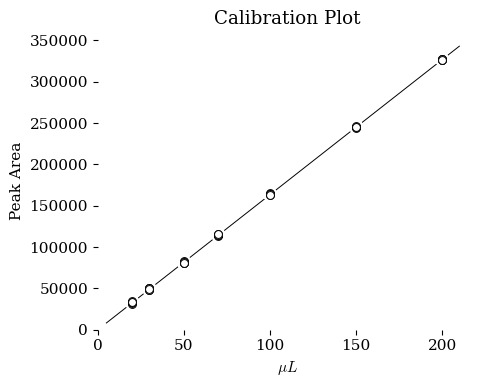

In [3]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(github_styles_location + "tufte.mplstyle")        
#plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

########################
### Plot the data    ###
########################

ax.scatter(x,y, marker = "o", color = "white", s = 96, edgecolors = "none", linewidths=0.7, zorder = 2)
ax.scatter(x,y, marker = "o", color = "white", s = 32, edgecolors = "black", linewidths=0.7, zorder = 2)

last_x = np.array(df.index)[-1]
x_axis = np.linspace([5., last_x*1.05], 100)

ax.plot(x_axis, x_axis * slope, "-", color = "black", linewidth=0.7, zorder = 1)


############################
### Set labels and scale ###
############################

ax.set(title = "Calibration Plot",
       ylabel=r"Peak Area", 
       xlabel=r"$\mu L $",
          xlim=0,                  
          ylim=0
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plot2.pdf")   # use this to save the figure in PDF format
plt.show()                   # output the combined plot plots


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

############################
### Set global variables 
############################

data_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/Permethrin/"
image_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/Permethrin/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################
df = pd.read_csv(data_path + "PM-Calibration2.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Vol (/uL)", 
                 comment = "#") 

means = df.mean(axis=1)
stdevs = df.std(axis=1)

df["mean"] = means
df["stdev"] = stdevs
display(df)

,Area-1,Area-2,Area-3,Area-4,Area-5,Area-6,mean,stdev
Vol (/uL),,,,,,,,
20,31553,31991,33784,34178,33671,33830,33167.833333,1103.119471
30,47717,50298,48470,50185,50026,49075,49295.166667,1053.715221
50,81206,83212,80860,82135,82250,80709,81728.666667,970.016014
70,115975,113347,114418,114965,114318,115340,114727.166667,911.820030
100,164874,163760,163519,164033,164139,163175,163916.666667,585.184643
150,245118,244527,245653,246896,245577,245320,245515.166667,787.632761
200,327267,326758,327735,326328,327121,326311,326920.000000,560.825106


In [5]:
x = df.index
y = df["mean"]
stdev = df["stdev"]

################################################################################
### Linear curve fit on the collected x,y data
################################################################################

def linear(x, slope, intercept):
    return slope * x + intercept

def linear0(x, slope):
    return slope * x 


param,pcov = curve_fit(linear,x,y, sigma = stdev, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print(param)
print(pcov)
print(perr)

### Use with 'linear' curve fit
#slope, intercept = param
#slope_stdev, intercept_stdev = perr
#print(f"Line is y = ({slope:0.2f} +/- {slope_stdev:0.2f})x + ({intercept:0.2f} +/- {intercept_stdev:0.2f})")

### Use with 'linear0' curve fit
slope = param[0]
slope_stdev = perr[0]
print(f"Line is y = ({slope:0.2f} +/- {slope_stdev:0.2f})x")


[1632.9607675   432.47372683]
[[ 2.15284980e+01 -2.48504295e+03]
 [-2.48504295e+03  3.72322898e+05]]
[  4.63988125 610.18267554]
Line is y = (1632.96 +/- 4.64)x


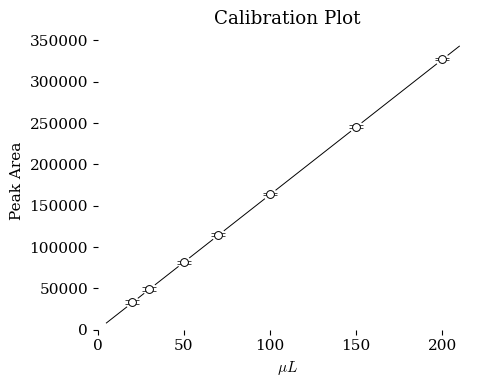

In [6]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(github_styles_location + "tufte.mplstyle")        
#plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

########################
### Plot the data    ###
########################

ax.scatter(x,y, marker = "o", color = "white", s = 96, edgecolors = "none", linewidths=0.7, zorder = 1)
ax.scatter(x,y, marker = "o", color = "white", s = 32, edgecolors = "black", linewidths=0.7, zorder = 3)

ax.errorbar(x, y,           # data
            yerr=2 * stdev,     # y errors
            xerr=None,      # x errors
            fmt='None',     # Data marker style
            ecolor="black", # Color of error bars
            elinewidth=0.7, # Thickness of vertical bar
            capsize=5,      # width of cap (in points)
            capthick=0.5,   # thickness of cap line
            zorder = 2)


last_x = np.array(df.index)[-1]
x_axis = np.linspace([5., last_x*1.05], 100)

ax.plot(x_axis, x_axis * slope, "-", color = "black", linewidth=0.7, zorder = 0)


############################
### Set labels and scale ###
############################

ax.set(title = "Calibration Plot",
       ylabel=r"Peak Area", 
       xlabel=r"$\mu L $",
          xlim=0,                  
          ylim=0
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                   # output the combined plot plots